In [40]:
import xarray as xr
import os
import xarray as xr
import numpy as np
import metpy
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import glob

In [3]:
datasets = [xr.open_dataset('mcs/' + f) for f in os.listdir('mcs')]
datasets = [ds.swap_dims({'Time': 'XTIME'}) for ds in datasets]
combined_dataset = xr.concat(datasets, dim='XTIME')

In [4]:
combined_dataset = combined_dataset.rename_dims({'XTIME': 'time'})

In [5]:
time0 = combined_dataset['time'][0]
for coord in combined_dataset.coords:
    if coord != 'XTIME':
        combined_dataset[coord] = combined_dataset[coord].sel(time = time0)

combined_dataset

<xarray.Dataset>
Dimensions:                (time: 25, south_north: 282, west_east: 405,
                            bottom_top: 37, bottom_top_stag: 38,
                            soil_layers_stag: 4, west_east_stag: 406,
                            south_north_stag: 283, seed_dim_stag: 2)
Coordinates:
    XLAT                   (south_north, west_east) float32 39.85 ... 49.82
    XLONG                  (south_north, west_east) float32 -128.9 ... -107.1
  * XTIME                  (time) datetime64[ns] 2024-08-17T12:00:00 ... 2024...
    XLAT_U                 (south_north, west_east_stag) float32 39.84 ... 49.81
    XLONG_U                (south_north, west_east_stag) float32 -128.9 ... -...
    XLAT_V                 (south_north_stag, west_east) float32 39.83 ... 49.83
    XLONG_V                (south_north_stag, west_east) float32 -128.9 ... -...
Dimensions without coordinates: time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag, seed_dim_stag
Data variables: (12/142)
    Times                  (time) |S19 b'2024-08-17_12:00:00' ... b'2024-08-1...
    LU_INDEX               (time, south_north, west_east) float32 17.0 ... 12.0
    ZNU                    (time, bottom_top) float32 0.9975 0.9925 ... 0.00455
    ZNW                    (time, bottom_top_stag) float32 1.0 0.995 ... 0.0
    ZS                     (time, soil_layers_stag) float32 0.05 0.25 ... 1.5
    DZS                    (time, soil_layers_stag) float32 0.1 0.3 ... 0.6 1.0
    ...                     ...
    C4F                    (time, bottom_top_stag) float32 0.0 5.209 ... 0.0
    PCB                    (time, south_north, west_east) float32 0.0 ... 0.0
    PC                     (time, south_north, west_east) float32 0.0 ... 0.0
    LANDMASK               (time, south_north, west_east) float32 0.0 ... 1.0
    LAKEMASK               (time, south_north, west_east) float32 0.0 ... 0.0
    SST                    (time, south_north, west_east) float32 292.3 ... 2...
Attributes: (12/146)
    TITLE:                            OUTPUT FROM WRF V4.1.3 MODEL
    START_DATE:                      2024-08-17_00:00:00
    SIMULATION_START_DATE:           2024-08-17_00:00:00
    WEST-EAST_GRID_DIMENSION:        406
    SOUTH-NORTH_GRID_DIMENSION:      283
    BOTTOM-TOP_GRID_DIMENSION:       38
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

<xarray.DataArray 'U10' (south_north: 282, west_east: 405)>
array([[ 2.7152202 ,  2.8732727 ,  2.9811823 , ...,  0.22222875,
        -1.0663983 , -1.9017456 ],
       [ 2.6651254 ,  2.823775  ,  2.9754875 , ..., -0.68627876,
        -1.7533389 , -2.480458  ],
       [ 2.661209  ,  2.823857  ,  2.9673302 , ..., -1.3542813 ,
        -2.4226882 , -2.9096103 ],
       ...,
       [ 0.50549227,  0.3748514 ,  0.23561537, ..., -5.213449  ,
        -5.19764   , -5.122049  ],
       [ 0.4152009 ,  0.27903938,  0.14035748, ..., -5.201899  ,
        -5.497353  , -5.4626594 ],
       [ 0.32705507,  0.19365577,  0.06307495, ..., -5.1808496 ,
        -5.4516115 , -5.48746   ]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 39.85 39.85 39.85 ... 49.82 49.82
    XLONG    (south_north, west_east) float32 -128.9 -128.8 ... -107.1 -107.1
    XTIME    datetime64[ns] 2024-08-17T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    

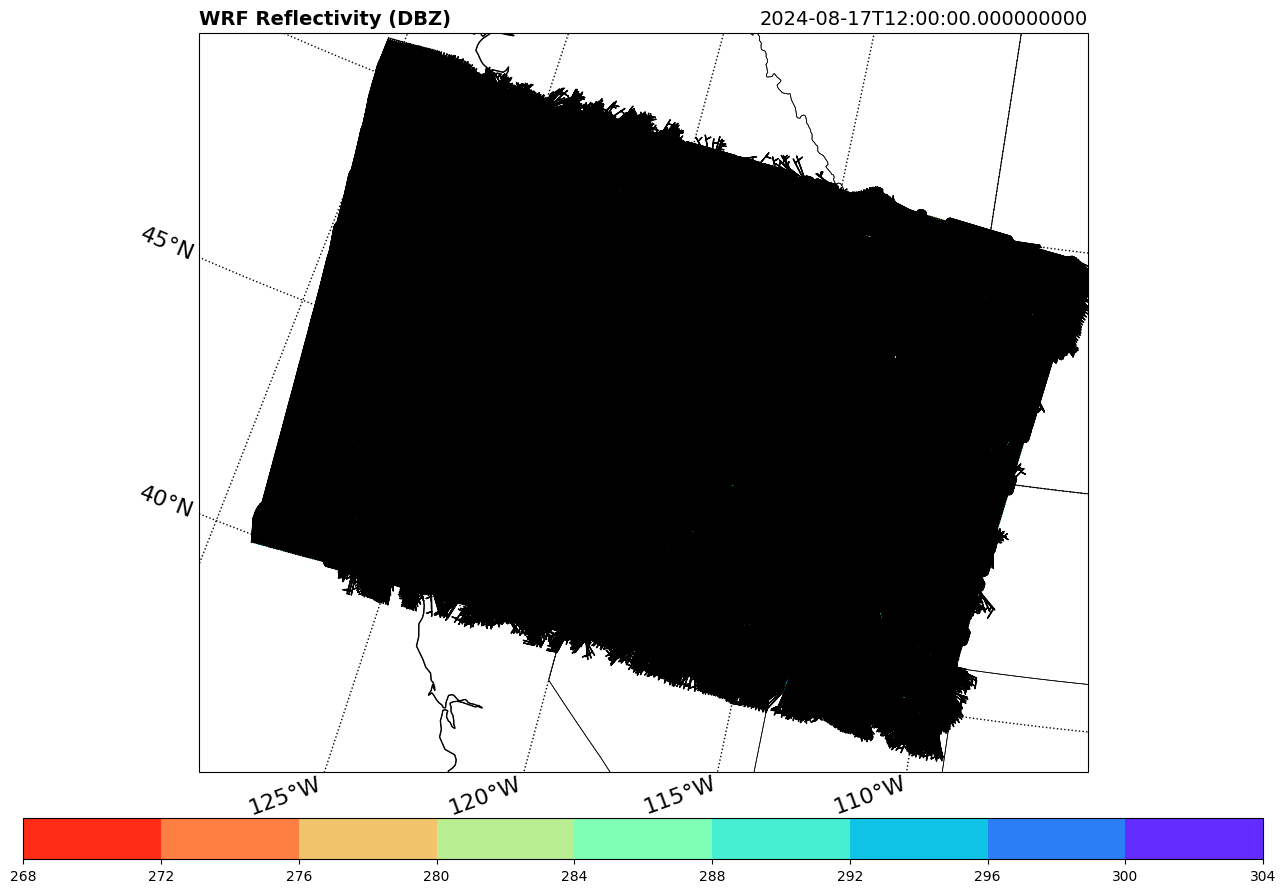

<xarray.DataArray 'U10' (south_north: 282, west_east: 405)>
array([[ 3.0561092 ,  3.0842965 ,  3.133871  , ...,  1.7321389 ,
         1.02113   ,  0.2960365 ],
       [ 2.7903578 ,  2.6395786 ,  2.6589832 , ...,  1.1445333 ,
         0.45339867, -0.19710968],
       [ 2.4497383 ,  2.05536   ,  1.9408048 , ...,  0.5768632 ,
        -0.38775373, -0.9382882 ],
       ...,
       [-0.363182  , -0.41843155, -0.4745649 , ..., -4.666058  ,
        -4.7259145 , -4.7725344 ],
       [-0.39708745, -0.4562415 , -0.51047176, ..., -4.573382  ,
        -4.8832564 , -4.897154  ],
       [-0.43270117, -0.49016902, -0.538401  , ..., -4.612045  ,
        -4.883508  , -4.8683667 ]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 39.85 39.85 39.85 ... 49.82 49.82
    XLONG    (south_north, west_east) float32 -128.9 -128.8 ... -107.1 -107.1
    XTIME    datetime64[ns] 2024-08-17T13:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    

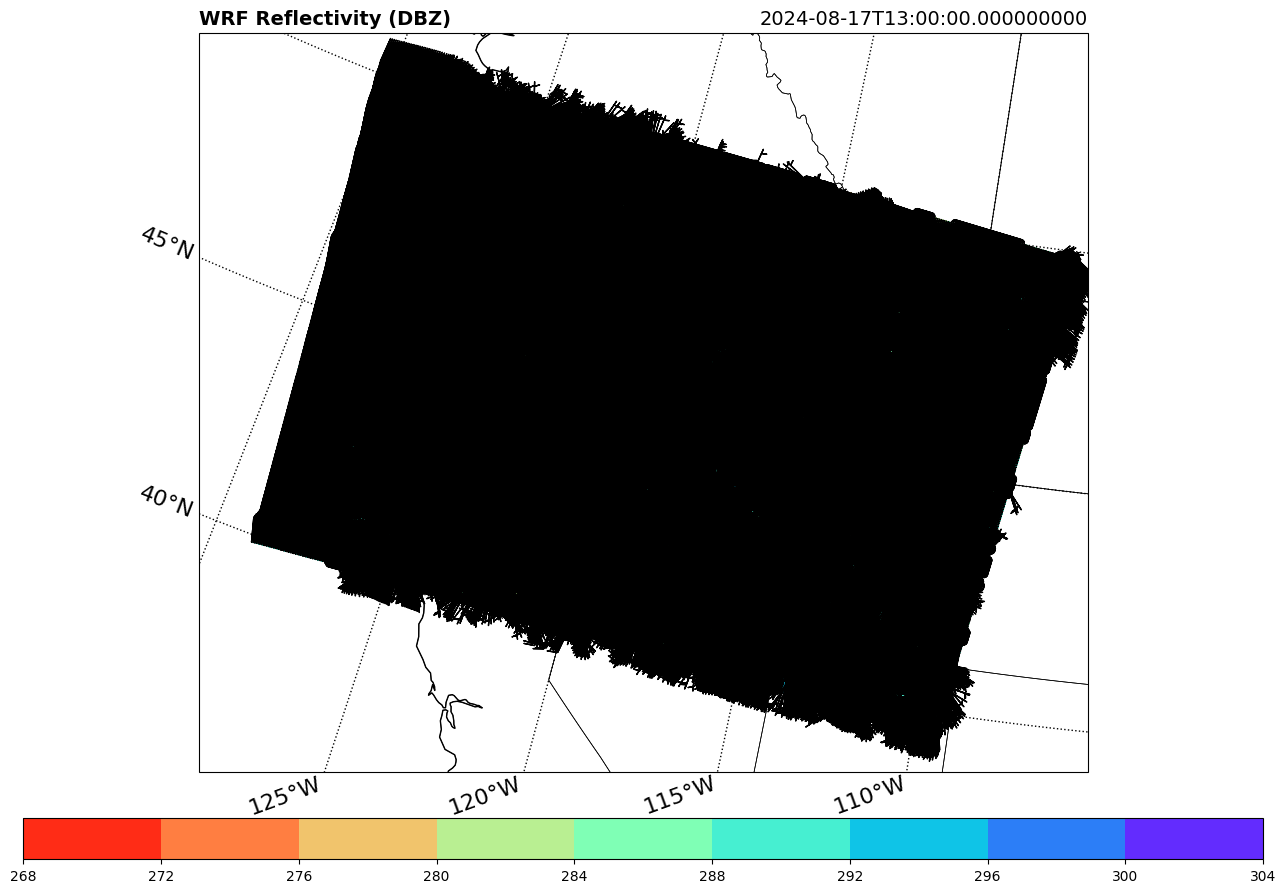

KeyboardInterrupt: 

In [ ]:
def make_maps(ds, var, title, bottom_top = 0, show = False, save = False, save_loc = None):
    for time in ds['XTIME']:
        if var == 'Wind':
            frame = ds.sel(XTIME = time)['T2'] 
            frameu = ds.sel(XTIME = time)['U10'] 
            framev = ds.sel(XTIME = time)['V10']
        else:
            frame = ds.sel(XTIME = time)[var]
        if 'bottom_top' in frame.dims:
            frame = frame.sel(bottom_top = bottom_top)
        lat_coord = [name for name in frame.coords if "LAT" in name][0]
        long_coord = [name for name in frame.coords if "LONG" in name][0]

        fig = plt.figure(figsize=(16, 12))
        ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
        ax.set_extent([-130, -107, 39, 51])
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
        ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
        ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

        
        if var == 'Wind':
            plt1 = ax.contourf(
                frame[long_coord], frame[lat_coord], frame, cmap='rainbow_r',
                transform=ccrs.PlateCarree())
            plt2 = ax.barbs(
                frame[long_coord].values, frame[lat_coord].values, frameu.values, framev.values, transform=ccrs.PlateCarree(), length = 1)
        else:
            plt1 = ax.contourf(
                frame[long_coord], frame[lat_coord], frame, cmap='rainbow_r',
                transform=ccrs.PlateCarree())

        cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)

        ax.set_title(
            'WRF ' + title,
            fontweight='bold', fontsize=14, loc='left')
        #dt = datetime.utcfromtimestamp(time.values.astype(int) * 1e-9)
        ax.set_title(time.values, fontsize=14, loc='right')
        
        # # Format the gridlines (optional)
        gl = ax.gridlines(
            crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
            y_inline=False, linewidth=1, color='k', linestyle=':')
        gl.xlocator = mticker.FixedLocator([-130, -125, -120, -115, -110])
        gl.ylocator = mticker.FixedLocator([40, 45, 50, 55])
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 16, 'rotation': 20}
        gl.ylabel_style = {'size': 16}

        plt.show()

make_maps(combined_dataset, 'Wind', 'Reflectivity (DBZ)')

In [ ]:
# Radar reflectivity (most important), wind, precip, OLR, CAPE (would need to calculate?)
vars_of_interest = ['REFL_10CM', 'U10', 'V10', 'T2' 'PREC_ACC_C', 'PREC_ACC_NC', 'OLR'] 
for var in vars_of_interest:
    make_maps(combined_dataset, var)

# U and V: do barbs instead, along with temp in back?



In [47]:
# also look for wind shear (0-6 km)
combined_dataset['XTIME'][0].values

numpy.datetime64('2024-08-17T12:00:00.000000000')